# Analisi delle password comuni

In questo notebook viene svolta un analisi basata su un dataset contenente le **password più comuni** in circolazione, con l’obiettivo di comprendere meglio le loro caratteristiche strutturali.  Questa analisi aiuta a evidenziare pattern ricorrenti, lunghezze tipiche e la composizione in termini di lettere, cifre e simboli.

## Struttura del del dataset: `common_passwords`

Il dataset è composto da un elenco di password comuni (ordinate in maniera decrescente in base alla diffusione), accompagnate da metriche utili alla loro classificazione. I principali campi sono:

- **`password`**: la stringa testuale della password 
- **`length`**: lunghezza complessiva della password (conteggio totale dei caratteri)
- **`num_chars`**: numero di **lettere** presenti nella password, indipendentemente dal fatto che siano minuscole o maiuscole.
- **`num_upper`**: numero di **lettere maiuscole** 
- **`num_lower`**: numero di **lettere minuscole**
- **`num_digits`**: numero di **cifre numeriche**


In [61]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("common_passwords.csv")


### Distribuzione delle lunghezze delle password più comuni

Il grafico mostra la distribuzione delle password in base alla loro lunghezza, con lo scopo di identificare  le lunghezze più comuni tra le password più diffuse. I dati vengono aggregati per lunghezza e visualizzati sotto forma di grafico a barre, con:
- l’asse X che rappresenta il numero di caratteri delle password;
- l’asse Y che indica il numero di occorrenze per ciascuna lunghezza.

Ogni barra è colorata in base alla sua altezza (valore assoluto) utilizzando una scala cromatica, mentre sopra ciascuna barra è visualizzato il valore esatto. 




In [62]:
# calcolo della frequenza delle password in base alla loro lunghezza 
length_counts = df["length"].value_counts().sort_index()
# grafico a barre
fig1 = px.bar(
    x=length_counts.index,
    y=length_counts.values,
    labels={"x": "Lunghezza", "y": "Conteggio"},
    text=length_counts.values,       # etichette sopra le barre
    color=length_counts.values,        # colora in base all’altezza
    color_continuous_scale="Blues"   # gradiente di blu
)
# stile delle etichette sopra le barre
fig1.update_traces(
    textposition="outside",   # testo sopra
    textfont=dict(size=14),                
    cliponaxis=False         # evita il taglio delle etichette
)
fig1.update_layout(
    template="plotly_dark",                  
    height=495,                             
    plot_bgcolor="#050b18",                  
    paper_bgcolor="#050b18",              
    font=dict(color="white", family="Segoe UI", size=26),  
    coloraxis_showscale=False,             
    margin=dict(l=60, r=60, t=80, b=60),   
    xaxis=dict(
        tickmode='linear',                  
        dtick=1                            
    )
)
fig1.show()


## Composizione media dei caratteri nelle password per lunghezza (Lettere / Numeri / Caratteri speciali)

Il grafico che rappresenta la **composizione media** delle password in base alla loro lunghezza. Per ogni lunghezza, viene visualizzata la media di tre componenti:

- **Lettere** (`num_chars`) – in blu scuro
- **Cifre** (`num_digits`) – in bianco
- **Simboli** (`num_special`) – in azzurro

Ogni barra è suddivisa in segmenti colorati che indicano quanto, in media, ciascun tipo di carattere contribuisce alla composizione di una password con quella lunghezza.


In [63]:
# Raggruppa le password per lunghezza e calcola la media dei caratteri di ciascun tipo (maiuscole, minuscole, numeri, simboli)
df_bar = df.groupby("length")[["num_upper", "num_lower", "num_digits", "num_special"]].mean().reset_index()
# Crea una nuova figura vuota
fig = go.Figure()
# aggiunta barre
fig.add_trace(go.Bar(
    name='Maiuscole',
    x=df_bar["length"],                
    y=df_bar["num_upper"],             
    marker_color="#42a5f5"             
))
fig.add_trace(go.Bar(
    name='Minuscole',
    x=df_bar["length"],
    y=df_bar["num_lower"],
    marker_color="#0d47a1"             
))
fig.add_trace(go.Bar(
    name='Cifre',
    x=df_bar["length"],
    y=df_bar["num_digits"],
    marker_color="#ffffff"             
))
fig.add_trace(go.Bar(
    name='Simboli',
    x=df_bar["length"],
    y=df_bar["num_special"],
    marker_color="#7E57C2"             
))
# stile grafico
fig.update_layout(
    barmode='stack', # barre verticali
    title_font=dict(
        size=28, family="Segoe UI", color="white"
    ),
    xaxis_title="Lunghezza",           
    xaxis=dict(
        tickmode="linear",            
        dtick=1
    ),
    template="plotly_dark",            
    plot_bgcolor="#050b18",            
    paper_bgcolor="#050b18",          
    font=dict(
        color="white", family="Segoe UI", size=26
    )
)
fig.show()


## Dieci password più comuni

Questa sezione rappresenta le **10 password più utilizzate** attraverso una doppia visualizzazione:

 **Grafico radiale a barre**  
Le lunghezze delle password sono rappresentate in modo circolare, con ogni barra corrispondente a una password, l'altezza che indica il numero di caratteri e un colore crescente di intensità per enfatizzare la posizione nella top 10. Sopra ogni barra è riportato il **ranking** e la password con relativa lunghezza (es. `#1 password (8)`), per facilitare l’interpretazione.

**Tabella**  
A fianco del grafico è presente una tabella che riepiloga la **posizione** (da 1 a 10), la **password** e la sua **lunghezza**. I colori delle righe della tabella sono **coerenti con il grafico radiale**, favorendo un’associazione visiva immediata tra le due rappresentazioni.


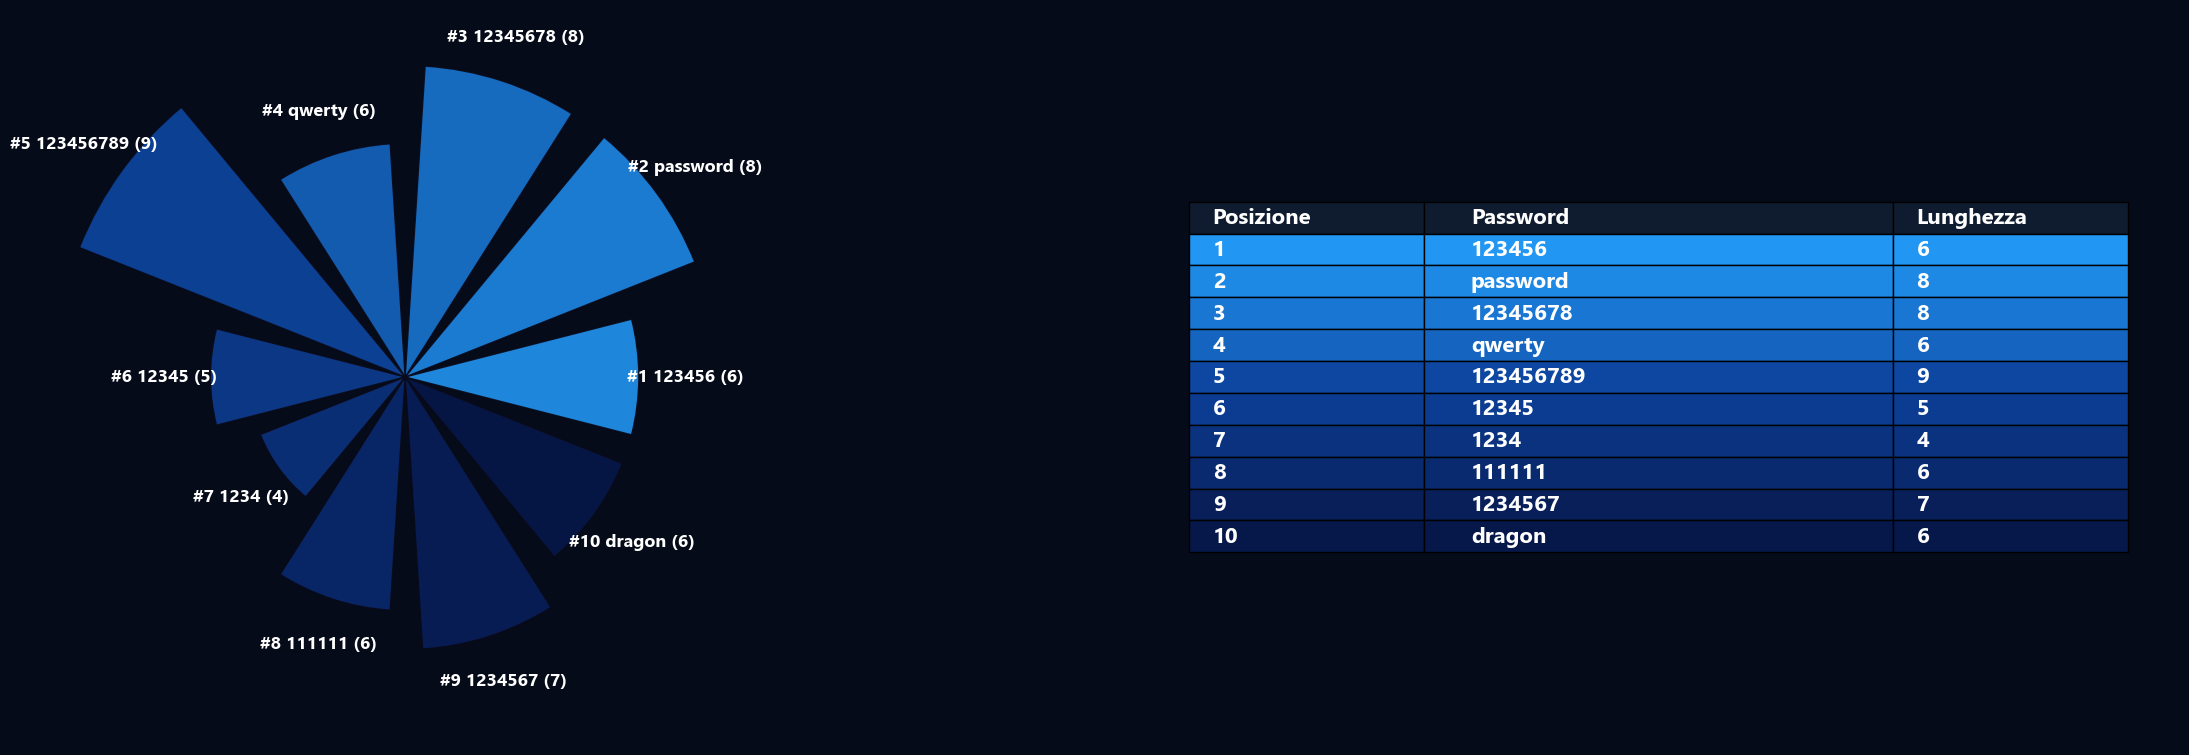

In [72]:
# estrazione delle prime 10 password del dataset (sono già in ordine) e creazione di colonna di posizione (1–10)
top10 = df.head(10).copy()
top10["Posizione"] = range(1, 11)
bar_colors = [
    "#2196f3", "#1e88e5", "#1976d2", "#1565c0", "#0d47a1",
    "#0c3c91", "#0b327f", "#092a6e", "#081f5a", "#06184a"
]
# figura con 2 aree per radiale e tabella
fig = plt.figure(figsize=(24, 8), facecolor='#050b18')
gs = fig.add_gridspec(1, 2, width_ratios=[2.4, 2.6], wspace=0.25)
# 1 GRAFICO RADIALE
# calcolo degli angoli equidistanti nel cerchio per ciascuna barra
angles = np.linspace(0, 2 * np.pi, len(top10), endpoint=False)
radii = top10["length"].values
# etichette
labels = top10["password"].values
# posizione numerica per etichetta 
positions = top10["Posizione"].values
# aggiunta alla figura del grafico
ax_radial = fig.add_subplot(gs[0], polar=True, facecolor='#050b18')
# barre circolari
bars = ax_radial.bar(
    angles,                  # angolo di ciascuna barra
    radii,                   # raggio (lunghezza password)
    width=0.5,               # larghezza angolare delle barre
    color=bar_colors,        # colore 
    alpha=0.9,               # trasparenza
    edgecolor="#0a0a1a"      # bordo scuro
)
# aggiunta etichette con password + lunghezza sopra ogni barra
for angle, radius, label, pos in zip(angles, radii, labels, positions):
    ax_radial.text(
        angle,
        radius + 1.2,    # posizione testuale leggermente oltre la barra
        f"#{pos} {label} ({radius})",  # es: "#1 123456 (6)"
        ha='center', va='center',
        color='white',
        fontsize=13,
        fontname='Segoe UI',
        fontweight='bold'
    )
#  pulizia 
ax_radial.set_yticks([])
ax_radial.set_xticks([])
ax_radial.spines['polar'].set_visible(False)

#2 TABELLA
# nuovo sottografico 
ax_table = fig.add_subplot(gs[1])
ax_table.axis('off')
# costruzuione  tabella
table_data = [["Posizione", "Password", "Lunghezza"]] + list(top10[["Posizione", "password", "length"]].values)
table = ax_table.table(
    cellText=table_data,
    colLabels=None,             # niente header extra
    cellLoc='left',             # allineamento testo
    loc='center',               # posizione nel subplot
    colWidths=[0.15, 0.30, 0.15]
)
table.auto_set_font_size(False)
table.set_fontsize(16)
table.scale(1.5, 1.6)
header_color = "#0f1c2f"  
# stile per riga 0 
for i in range(3):
    cell = table[(0, i)]
    cell.set_facecolor(header_color)
    cell.set_text_props(color='white', fontname='Segoe UI', weight='bold')
# altre righe
for row in range(1, 11):
    for col in range(3):
        cell = table[(row, col)]
        cell.set_facecolor(bar_colors[row - 1])  # colore coerente con grafico radiale
        cell.set_text_props(color='white', fontname='Segoe UI', weight='bold')

plt.subplots_adjust(left=0.03, right=0.97, top=0.96, bottom=0.04)
plt.show()

